In [13]:
%matplotlib inline
from pycbc.waveform import get_fd_waveform
import matplotlib.pyplot as plt
import bilby
import numpy as np

In [3]:
pycbc = get_fd_waveform(approximant='IMRPhenomD', mass1=50, mass2=50, delta_f=1./16, f_ref=50, f_lower=20, spin1z = 0.90, spin2z= 0.95 )

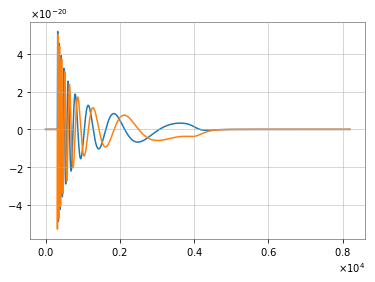

In [36]:
plt.plot(np.array(pycbc).T)

In [37]:
waveform_arguments = {'waveform_approximant': 'IMRPhenomD',
                      'reference_frequency': 50, 'minimum_frequency':20}

In [38]:
bilby = bilby.gw.WaveformGenerator(duration=16, sampling_frequency=1024, 
                           frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole, waveform_arguments=waveform_arguments)

In [39]:
injection_parameters = dict(
    mass_1=50., mass_2=50., a_1=0.9, a_2=0.9, tilt_1=0.0, tilt_2=0.0,
    phi_12=0.0, phi_jl=0.0, luminosity_distance=1.0, iota=0.0,
    phase=0.0)

In [40]:
bilby_wf = bilby.frequency_domain_strain(injection_parameters)

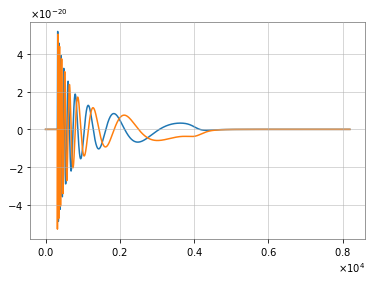

In [41]:
for mode in bilby_wf:
    plt.plot(bilby_wf[mode])

In [42]:
diff_plus = bilby_wf['plus']-np.array(pycbc[0]).T

In [43]:
diff_cross = bilby_wf['cross']-np.array(pycbc[1]).T

/home/c1819547/miniconda3/envs/bilby_lalsuite_gwpy/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


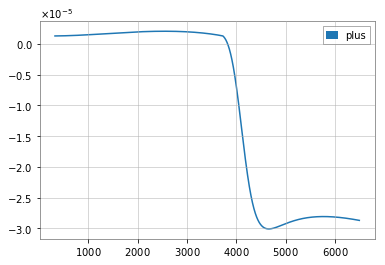

In [46]:
plt.plot(diff_plus / bilby_wf['plus'], label = 'plus')
# plt.plot(diff_cross, label = 'cross')
plt.plot(bilby_wf['plus'])
plt.legend(loc = 'best')

In [61]:
bilby_tot = (abs(bilby_wf['plus'])**2 + abs(bilby_wf['cross'])**2)**0.5

In [64]:
pycbc_tot = np.array((abs(pycbc[0])**2+abs(pycbc[1])**2)**0.5).T

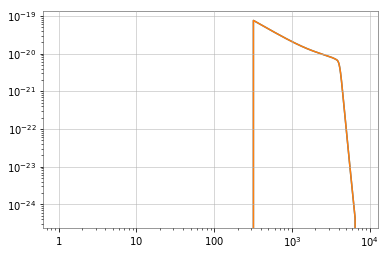

In [65]:
plt.loglog(bilby_tot)
plt.loglog(pycbc_tot)

/home/c1819547/miniconda3/envs/bilby_lalsuite_gwpy/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


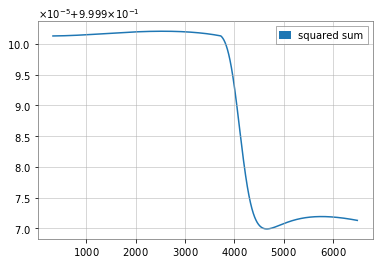

In [72]:
plt.plot(bilby_tot/pycbc_tot, label = 'squared sum')
plt.legend(loc = 'best')